In [0]:
import pandas as pd

In [0]:
df = pd.read_csv("train.csv") 

In [3]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


Analysis

In [4]:
df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [0]:
labels_df = df.drop(columns=['id','comment_text'])

In [6]:
labels_df.shape

(159571, 6)

In [0]:
labels = labels_df.columns.values
label_dist = {}

for label in labels:
  label_dist[label] = labels_df[label].sum()

In [8]:
label_dist

{'identity_hate': 1405,
 'insult': 7877,
 'obscene': 8449,
 'severe_toxic': 1595,
 'threat': 478,
 'toxic': 15294}

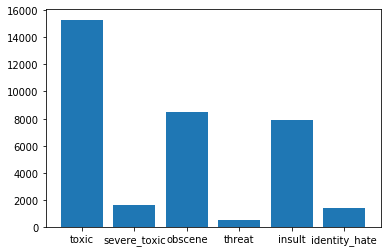

In [9]:
import matplotlib.pyplot as plt
plt.bar(label_dist.keys(), label_dist.values())
plt.show()

In [0]:
no_of_labels = df.iloc[:,2:].sum(axis=1)
x = no_of_labels.value_counts()

Text(0.5, 0, 'Number of labels')

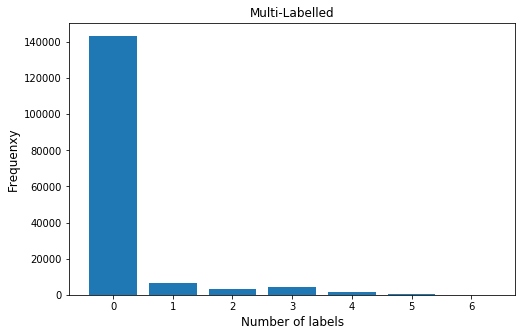

In [11]:
plt.figure(figsize=(8,5))
plt.bar(x.index,x.values)
plt.title("Multi-Labelled")
plt.ylabel('Frequenxy', fontsize=12)
plt.xlabel('Number of labels', fontsize=12)

In [0]:
def perc_ratio(column):
  print("Percentage of comments labelled \'" + column + "\' = " + str(100*len(df[(df[column]==1)])/len(df)) + "%")

In [13]:
for label in label_dist.keys():
  perc_ratio(label)

Percentage of comments labelled 'toxic' = 9.584448302009763%
Percentage of comments labelled 'severe_toxic' = 0.9995550569965721%
Percentage of comments labelled 'obscene' = 5.2948217407925%
Percentage of comments labelled 'threat' = 0.2995531769557125%
Percentage of comments labelled 'insult' = 4.936360616904074%
Percentage of comments labelled 'identity_hate' = 0.8804858025581089%


In [14]:
print('Percentage of comments that are not labelled:')
print(100*len(df[(df['toxic']==0) & (df['severe_toxic']==0) & (df['obscene']==0) & (df['threat']== 0) & (df['insult']==0) & (df['identity_hate']==0)]) / len(df))

Percentage of comments that are not labelled:
89.83211235124176


In [0]:
df['comment_text'][3]
text = df['comment_text'][3]

In [0]:
import re
def clean(text):
  text = re.sub('\n', ' ', text).lower()
  return re.sub('[^A-Za-z ]', '', text)

In [17]:
clean(text)

' more i cant make any real suggestions on improvement  i wondered if the section statistics should be later on or a subsection of types of accidents  i think the references may need tidying so that they are all in the exact same format ie date format etc i can do that later on if noone else does first  if you have any preferences for formatting style on references or want to do it yourself please let me know  there appears to be a backlog on articles for review so i guess there may be a delay until a reviewer turns up its listed in the relevant form eg wikipediagoodarticlenominationstransport  '

In [0]:
df['clean_text'] = df['comment_text'].apply(clean)

In [19]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, random_state=42, test_size=0.25, shuffle=True)
X_train = train.clean_text
X_test = test.clean_text
print(X_train.shape)
print(X_test.shape)

(119678,)
(39893,)


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

LogReg_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=1)),
            ])
for label in labels:
    print('... Processing {}'.format(label))
    # train the model using X_dtm & y
    LogReg_pipeline.fit(X_train, train[label])
    # compute the testing accuracy
    prediction = LogReg_pipeline.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(test[label], prediction)))

... Processing toxic
Test accuracy is 0.9561577219060988
... Processing severe_toxic
Test accuracy is 0.99090065926353
... Processing obscene
Test accuracy is 0.9759356278043767
... Processing threat
Test accuracy is 0.9975935627804376
... Processing insult
Test accuracy is 0.9690923219612463
... Processing identity_hate
Test accuracy is 0.9916025367859023
